# Torch GLRT Confidence Intervals

Use GLRT and attribution regularization to calculate CIs for attributions of a Torch model.

Demonstrated here with an OLS model.

The GLRT results should not match bootstrap and analytic for two reasons:
* I'm not sure the GLRT torch code is perfect yet
* Attributions are generally strictly positive, unlike regression coefficients

In [1]:
import numpy as np
import torch
from bootstrapCoefficients import bootstrapCis
from analyticLinearRegressionCIs import analyticLinearCis
from glrtTorch import glrtTorchCis
from DataGeneration import default_data
from sklearn.linear_model import LinearRegression
from torch_linear import TorchLinear

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
X, y = default_data()

## Sklearn model
Bootstrap and analytic results

In [5]:
LR = LinearRegression()
LR.fit(X, y)
print("Coefficients:", LR.coef_)

print("Bootstrapping")
lcb_LR, ucb_LR = bootstrapCis(LinearRegression, X, y, alpha=0.05, replicates=1000)
print("Lower bounds:", lcb_LR, "\nUpper bounds:", ucb_LR)

print("Analytic solution")
lcb_LR_a, ucb_LR_a = analyticLinearCis(LR, X, y, alpha=0.05)
print("Lower bounds:", lcb_LR_a, "\nUpper bounds:", ucb_LR_a)

Coefficients: [1.00243218 0.90331003]
Bootstrapping
Lower bounds: [0.84243766 0.72281441] 
Upper bounds: [1.16514418 1.06252521]
Analytic solution
Lower bounds: [0.84801326 0.74936744] 
Upper bounds: [1.15685111 1.05725261]


# Torch model
Bootstrap and analytic results

In [4]:
TL = TorchLinear(lr=0.3,max_iter=30)
TL.fit(X,y)
# Takes ~4min
print("Bootstrapping")
lcb_TL, ucb_TL = bootstrapCis(lambda:TorchLinear(lr=0.3,max_iter=30), X=X, y=y, alpha=0.05, replicates=1000)
print("Lower bounds:", lcb_TL, "\nUpper bounds:", ucb_TL)

print("Analytic solution")
lcb_TL_a, ucb_TL_a = analyticLinearCis(TL, X, y, alpha=0.05)
print("Lower bounds:", lcb_TL_a, "\nUpper bounds:", ucb_TL_a)

Bootstrapping
Lower bounds: [0.85332745 0.74118227] 
Upper bounds: [1.16481781 1.05910635]
Analytic solution
Lower bounds: [0.84802666 0.74935347] 
Upper bounds: [1.1568645  1.05723864]


GLRT Results

In [8]:
TL = TorchLinear(lr=0.3,max_iter=30)
TL.fit(X,y)
print("GLRT")
lcb_GLRT, ucb_GLRT, lcb_Reults, ucb_Results = glrtTorchCis(lambda:TorchLinear(lr=0.3,max_iter=100), X=X, y=y, alpha=0.05,search_kwargs={'lmbds':np.logspace(-10,10,101)},fit_kwargs={'lr':0.3,'max_iter':30})
print("Lower bounds:", lcb_GLRT, "\nUpper bounds:", ucb_GLRT)

GLRT
Lower bounds: [0.5152213  0.42610252] 
Upper bounds: [1.03723383 0.91188192]


In [17]:
ucb_Results[0][0][:10]

array([0.8824743 , 0.88247436, 0.88247418, 0.8824743 , 0.88247442,
       0.8824743 , 0.88247418, 0.8824743 , 0.8824743 , 0.8824743 ])

[]

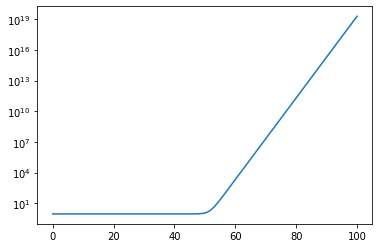

In [16]:
plt.plot(ucb_Results[0][0])
plt.semilogy()

[]

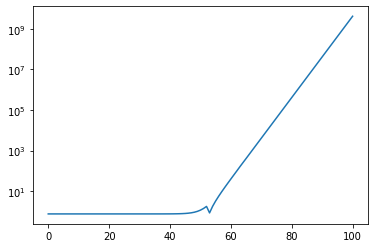

In [18]:
plt.plot(ucb_Results[0][1])
plt.semilogy()

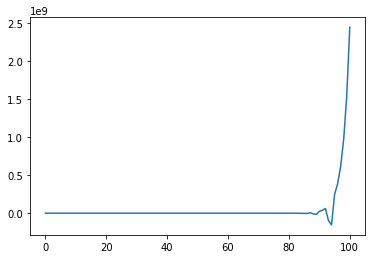

In [21]:
plt.plot(ucb_Results[0][2][:,0])
# plt.semilogy()

In [9]:
ucb_Results[0][1][:10]

array([0.77621943, 0.77623391, 0.77622324, 0.7762394 , 0.77622938,
       0.77623308, 0.77622354, 0.77621901, 0.77623868, 0.77623296])

In [10]:
ucb_Results[0][2][:10]

array([[1.0024202 , 0.90332264],
       [1.0024388 , 0.90330315],
       [1.002425  , 0.9033176 ],
       [1.002446  , 0.9032955 ],
       [1.0024333 , 0.90330887],
       [1.0024378 , 0.90330416],
       [1.0024253 , 0.9033173 ],
       [1.0024196 , 0.9033231 ],
       [1.0024455 , 0.9032961 ],
       [1.0024376 , 0.90330434]], dtype=float32)

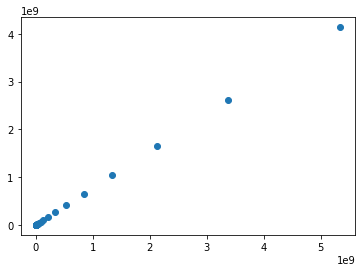

In [11]:
plt.scatter(np.abs(ucb_Results[0][2][:,0]),ucb_Results[0][1])

In [11]:
len(ucb_Results[0][1])

1001